# 

In [74]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import zipfile2
import yfinance as yf
import warnings
warnings.filterwarnings('ignore')

import fetch as f # local file

START_DATE = "2019-01-01"

big_7 = ["NVDA", "TSLA", "GOOG", "MSFT", "META", "AMZN", "AAPL"]
portfolio = ["NVDA", "GCT", "RYAAY"]
crypto3 = ["BTC-USD","ETH-USD","SOL-USD"]

big7_price = yf.download(big_7, start = START_DATE, interval = "1wk", group_by = "tickers") # big 7 pric history
portfolio_price = yf.download(portfolio, start = START_DATE, interval = "1wk", group_by = "tickers") # portfolio price history
crypto3_price = yf.download(crypto3, start = START_DATE, interval = "1d", group_by = "tickers")

big7_fin = f.bulkfin(big_7).reset_index() # big 7 financial statements (quarterly)
portfolio_fin = f.bulkfin(portfolio).reset_index() # portfolio financial statements (quarterly)

[*********************100%%**********************]  7 of 7 completed
[*********************100%%**********************]  3 of 3 completed
[*********************100%%**********************]  3 of 3 completed


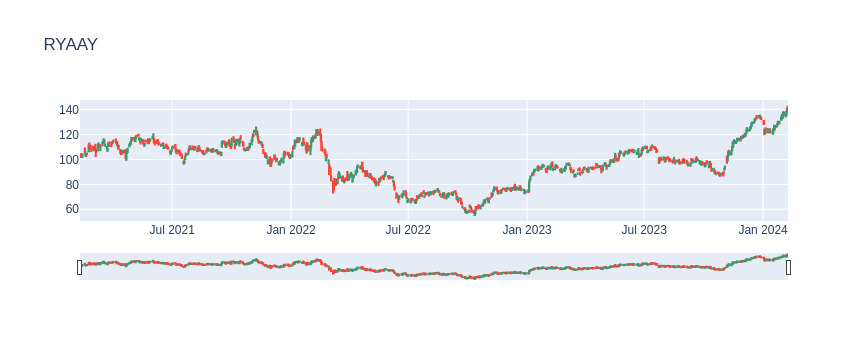

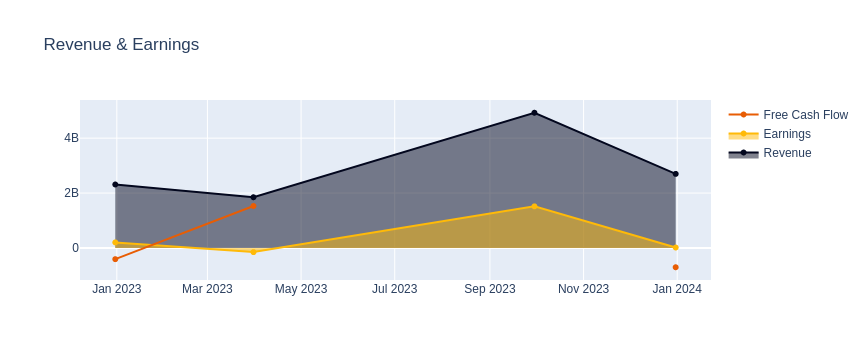

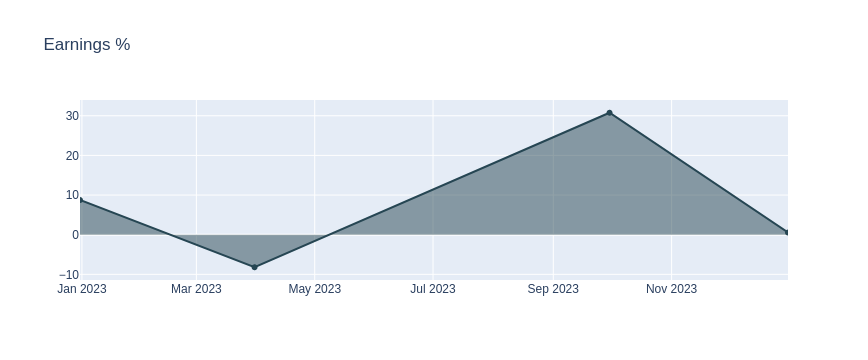

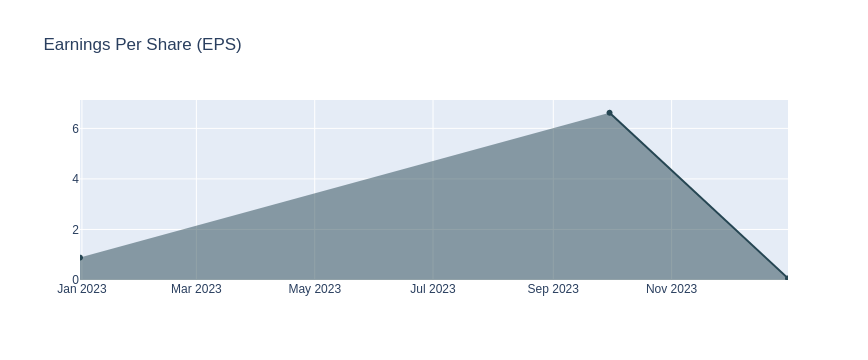

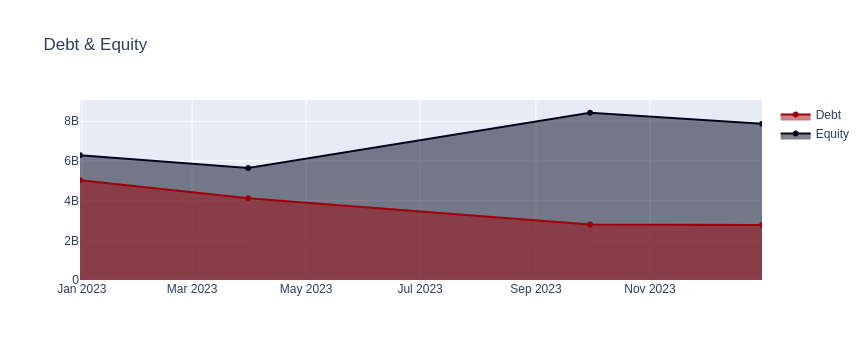

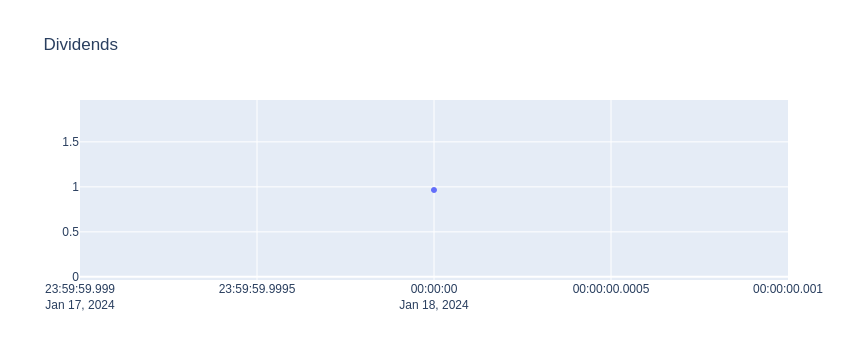

        0                                      1
0   0.00%        % of Shares Held by All Insider
1  46.84%       % of Shares Held by Institutions
2  46.84%        % of Float Held by Institutions
3     412  Number of Institutions Holding Shares
Institutional Holders
                                 Holder    Shares Date Reported   % Out  \
0       Capital International Investors  10549301    2023-09-29  0.0463   
1  Massachusetts Financial Services Co.  10320082    2023-09-29  0.0453   
2           Baillie Gifford and Company   9389236    2023-12-30  0.0412   
3                Harris Associates L.P.   7246472    2023-09-29  0.0318   
4                              FMR, LLC   6421508    2023-09-29  0.0282   
5           Lazard Asset Management LLC   6147676    2023-09-29  0.0270   
6     Great-West Life Assurance Company   5465520    2023-09-29  0.0240   
7               Capital World Investors   4870014    2023-09-29  0.0214   
8       Causeway Capital Management LLC   4117682    2023-

In [120]:
ticker = "RYAAY"

tkr = yf.Ticker(ticker)
df = f.financials(ticker)
df['Earnings %'] = df['Net Income']/df['Total Revenue']

# print weekly candlesticks for last 3 years
hist = tkr.history(period="3y", interval="1d").reset_index()
fig = go.Figure(data=[go.Candlestick(x=hist['Date'],
                open=hist['Open'],
                high=hist['High'],
                low=hist['Low'],
                close=hist['Close'])])
fig.update_layout(title=f'{ticker}')
fig.show()

# Revenue & Earnings
fig = go.Figure()
fig.add_trace(go.Scatter(x=df["Date"], y=df["Total Revenue"], 
                            fill='tonexty',
                            mode="lines+markers",
                            line_color="rgb(3, 7, 30)",
                            # line_color="rgb(51,153,255)",
                            name="Revenue"))
# fig.add_trace(go.Scatter(x=df["Date"], y=df["Gross Profit"], 
#                             fill='tozeroy',
#                             mode="lines+markers",
#                             name="Gross Profit"))
fig.add_trace(go.Scatter(x=df["Date"], y=df["Net Income"], 
                            fill='tozeroy',
                            mode="lines+markers",
                            # line_color="rgb(38,70,83)",
                            line_color="rgb(255, 186, 8)",
                            name="Earnings")) # ADD EARNINGS % TO LABELS
fig.add_trace(go.Scatter(x=df["Date"], y=df["Free Cash Flow"], 
                            # fill='tozeroy',
                            mode="lines+markers",
                            line_color="rgb(232, 93, 4)",
                            name="Free Cash Flow"))
fig.update_traces(marker_colorscale="Earth", selector=dict(type='scatter'))
fig.update_layout(title="Revenue & Earnings", yaxis_zeroline=True)
fig.show()

# Earnings %
fig = go.Figure()
fig.add_trace(go.Scatter(x=df["Date"], y=df["Earnings %"]*100,
                            fill='tozeroy',
                            mode="lines+markers",
                            line_color="rgb(38,70,83)",
                            name="Revenue"))
fig.update_traces(marker_colorscale="Earth", selector=dict(type='scatter'))
fig.update_layout(title="Earnings %")
fig.show()


# EPS
fig = go.Figure()
fig.add_trace(go.Scatter(x=df["Date"], y=df["Diluted EPS"],
                            fill='tozeroy',
                            mode="lines+markers",
                            line_color="rgb(38,70,83)",
                            name="Equity"))
fig.update_layout(title="Earnings Per Share (EPS)")
fig.show()

# Debt:Equity
fig = go.Figure()
fig.add_trace(go.Scatter(x=df["Date"], y=df["Total Equity Gross Minority Interest"], 
                            fill='tonexty',
                            mode="lines+markers",
                            line_color="rgb(3, 7, 30)",
                            name="Equity")) # fill to trace0 y
fig.add_trace(go.Scatter(x=df["Date"], y=df["Total Debt"], 
                            fill='tozeroy',
                            mode="lines+markers",
                            line_color="rgb(157, 2, 8)",
                            name="Debt")) # fill down to xaxis
fig.update_layout(title="Debt & Equity")
fig.show()

# dividens
df = tkr.dividends.reset_index()
pd.to_datetime(df["Date"])
fig = go.Figure()
fig.add_trace(go.Scatter(x=df["Date"], y=df["Dividends"],
                        mode="lines+markers"))
fig.update_layout(title="Dividends")
fig.show()

# ownership
df = tkr.major_holders
# df = df[0:3]
# df = df.rename(columns={0:"%", 1:"Owner"})
# fig_holders = px.bar(df, color="Owner", x="%", title="Ownership", orientation='h')
# fig_holders.show()
print(df)
print("Institutional Holders")
print(tkr.institutional_holders)
print("Mutual Fund Holders")
print(tkr.mutualfund_holders)

In [31]:
# crypto3_price

In [32]:
# btc = yf.Ticker("BTC-USD")
# btc = pd.DataFrame(btc)
# btc.reset_index()

In [93]:
ticker = "NVDA"

df = f.financials(ticker)
# df = df.columns

for column in df.columns:
    if "Cash" in column:
        print(column)

Cash Cash Equivalents And Short Term Investments
Cash And Cash Equivalents
Free Cash Flow
End Cash Position
Beginning Cash Position
Changes In Cash
Financing Cash Flow
Cash Flow From Continuing Financing Activities
Cash Dividends Paid
Investing Cash Flow
Cash Flow From Continuing Investing Activities
Operating Cash Flow
Cash Flow From Continuing Operating Activities
Other Non Cash Items
